#2조

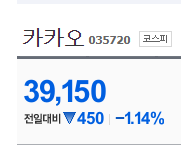

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
####################
# 첫 페이지 크롤링 #
####################

url = 'https://finance.naver.com/item/sise_day.naver?code=035720&page=1'
headers = {'User-Agent':'Mozilla/5.0'}
res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.text, 'html.parser')
soup


<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>네이버페이 증권</title>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/newstock.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/layout.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/main.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/newstock2.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/newstock3.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20231020132851/css/world.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<script languag

In [ ]:
# 증권 속성 추출
title = soup.select('table.type2 > tr > th')
title_list = []
for i in title:
  title_list.append(i.text)
title_list

['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량']

In [ ]:
# 수치 데이터 추출
num_data = soup.select('tr > td > span.tah')
num_data_list = []
for i in num_data:
  num_data_list.append(i.text)
num_data_list # 리스트 첫 번째 항부터 날짜, 종가, 전일비, 시가, 고가, 저가, 거래량 순이며, 그 이후 날짜, 종가 ... 순으로 반복된다고 알 수 있음

['2023.10.25',
 '38,950',
 '\n\t\t\t\t650\n\t\t\t\t',
 '39,600',
 '39,650',
 '38,850',
 '1,412,106',
 '2023.10.24',
 '39,600',
 '\n\t\t\t\t1,650\n\t\t\t\t',
 '38,300',
 '39,700',
 '37,850',
 '2,739,742',
 '2023.10.23',
 '37,950',
 '\n\t\t\t\t1,100\n\t\t\t\t',
 '38,200',
 '38,900',
 '37,850',
 '2,585,077',
 '2023.10.20',
 '39,050',
 '\n\t\t\t\t1,450\n\t\t\t\t',
 '39,750',
 '40,150',
 '38,850',
 '2,483,524',
 '2023.10.19',
 '40,500',
 '\n\t\t\t\t1,300\n\t\t\t\t',
 '41,000',
 '41,400',
 '40,450',
 '1,699,061',
 '2023.10.18',
 '41,800',
 '\n\t\t\t\t1,000\n\t\t\t\t',
 '42,400',
 '42,950',
 '41,800',
 '1,389,354',
 '2023.10.17',
 '42,800',
 '\n\t\t\t\t350\n\t\t\t\t',
 '43,400',
 '44,050',
 '42,800',
 '1,063,385',
 '2023.10.16',
 '43,150',
 '\n\t\t\t\t50\n\t\t\t\t',
 '43,250',
 '43,900',
 '42,400',
 '941,701',
 '2023.10.13',
 '43,200',
 '\n\t\t\t\t450\n\t\t\t\t',
 '43,250',
 '43,650',
 '43,050',
 '589,597',
 '2023.10.12',
 '43,650',
 '\n\t\t\t\t1,000\n\t\t\t\t',
 '42,700',
 '44,000',
 '42,600

In [ ]:
# 특정 인덱스에 7를 나눈 후 나머지를 통해 각 증권 속성에 대한 데이터를 추출할 수 있음
data_list = [] # 날짜
end_price = [] # 종가
start_price = [] # 시가
up_down_price = [] # 전일비
top_price = [] # 고가
below_price = [] # 저가
trade_price = [] # 거래량
for idx, val in enumerate(num_data_list):
  if idx % 7 == 0: # 날짜
    data_list.append(val)
  elif idx % 7 == 1: # 종가
    end_price.append(int(val.replace(',','')))
  elif idx % 7 == 2: # 전일비
    up_down_price.append(int(val.strip().replace(',','')))
  elif idx % 7 == 3: # 시가
    start_price.append(int(val.replace(',','')))
  elif idx % 7 == 4: # 고가
    top_price.append(int(val.replace(',','')))
  elif idx % 7 == 5: # 저가
    below_price.append(int(val.replace(',','')))
  else: # 거래량
    trade_price.append(int(val.replace(',','')))
up_down_price_result = []
for i, j, k in zip(up_down_price, end_price, start_price):
  if j < k:
    up_down_price_result.append(-i)
  else:
    up_down_price_result.append(i)

In [ ]:
# pandas를 이용하여 Dataframe으로 정렬
import pandas as pd

In [ ]:
df_dic = {'날짜':data_list,'종가':end_price,'시가':start_price,'전일비':up_down_price_result,'고가':top_price,'저가':below_price,'거래량':trade_price}
df = pd.DataFrame(df_dic)
df

,날짜,종가,시가,전일비,고가,저가,거래량
0,2023.10.25,38950,39600,-650,39650,38850,1412106
1,2023.10.24,39600,38300,1650,39700,37850,2739742
2,2023.10.23,37950,38200,-1100,38900,37850,2585077
3,2023.10.20,39050,39750,-1450,40150,38850,2483524
4,2023.10.19,40500,41000,-1300,41400,40450,1699061
5,2023.10.18,41800,42400,-1000,42950,41800,1389354
6,2023.10.17,42800,43400,-350,44050,42800,1063385
7,2023.10.16,43150,43250,-50,43900,42400,941701
8,2023.10.13,43200,43250,-450,43650,43050,589597
9,2023.10.12,43650,42700,1000,44000,42600,1373599


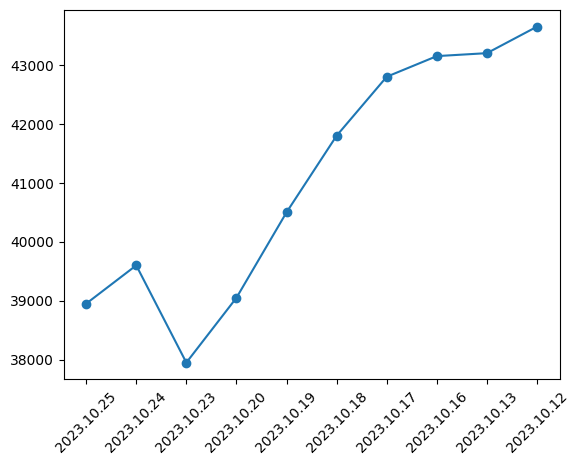

In [ ]:
# 시각화
import matplotlib.pyplot as plt
# 종가
plt.plot(df['날짜'], df['종가'])
plt.scatter(df['날짜'], df['종가'])
plt.xticks(ticks=df['날짜'], rotation = 45)
plt.show()

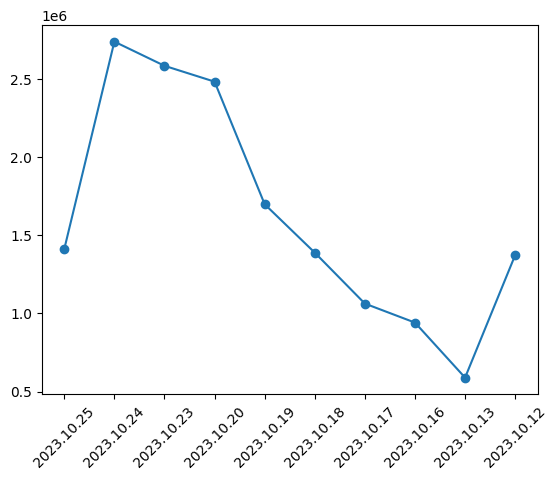

In [ ]:
# 거래량
plt.plot(df['날짜'], df['거래량'])
plt.scatter(df['날짜'], df['거래량'])
plt.xticks(ticks = df['날짜'], rotation = 45)
plt.show()

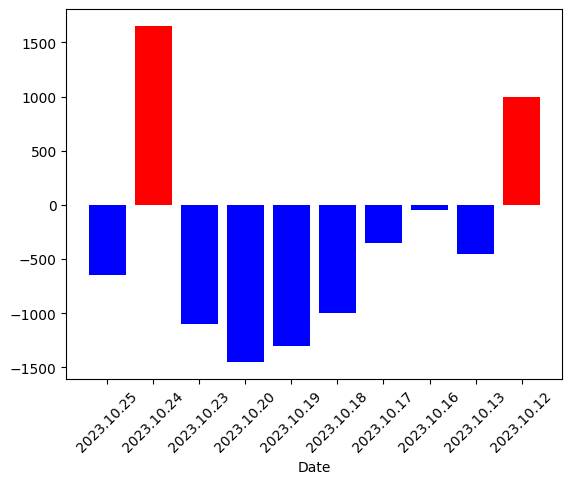

In [ ]:
# 전일비
color = []
for i in df['전일비']:
  if i >= 0:
    color.append('red')
  else:
    color.append('blue')
plt.bar(df['날짜'], df['전일비'], color = color)
plt.xlabel('Date')
plt.xticks(ticks = df['날짜'], rotation = 45)
plt.show()